In [78]:
# !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

In [79]:
# !unzip bank+marketing.zip
# !unzip bank.zip

In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import display
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline

In [81]:
df = pd.read_csv('bank-full.csv', delimiter=';')

In [82]:
columns_used = ["age", "job", "marital", "education", "balance", "housing", "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"]
df = df[columns_used]

In [83]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [84]:
(df == "unknown").sum()

,0
age,0
job,288
marital,0
education,1857
balance,0
housing,0
contact,13020
day,0
month,0
duration,0


In [85]:
# Question 1
df.education.mode()

,education
0,secondary


In [103]:
numerical = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
categorical = ["job", "marital", "education", "housing", "contact", "month", "poutcome"]

In [104]:
df[categorical].nunique()

,0
job,12
marital,3
education,4
housing,2
contact,3
month,12
poutcome,4


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [105]:
# Question 2
df_numeric = df.copy()
df_numeric = df_numeric.drop(categorical + ["y"], axis=1)
corr_matrix = df_numeric.corr()
corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


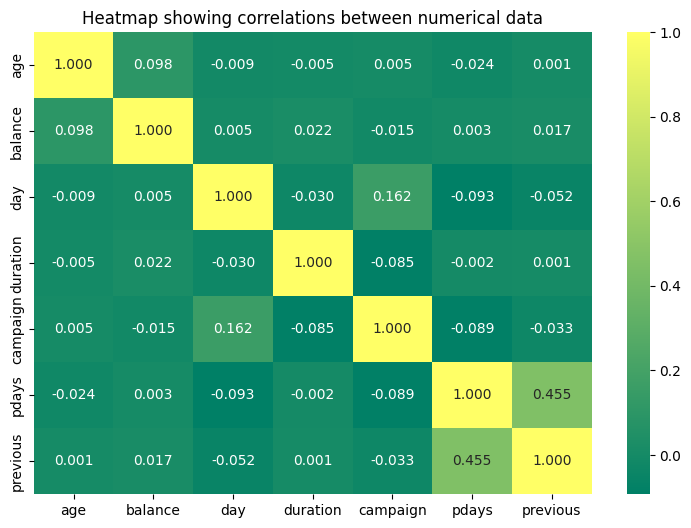

In [90]:
plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [91]:
corr_matrix.unstack().sort_values(ascending = False)

age       age         1.000000
balance   balance     1.000000
pdays     pdays       1.000000
campaign  campaign    1.000000
day       day         1.000000
duration  duration    1.000000
previous  previous    1.000000
          pdays       0.454820
pdays     previous    0.454820
campaign  day         0.162490
day       campaign    0.162490
age       balance     0.097783
balance   age         0.097783
          duration    0.021560
duration  balance     0.021560
balance   previous    0.016674
previous  balance     0.016674
age       campaign    0.004760
campaign  age         0.004760
balance   day         0.004503
day       balance     0.004503
balance   pdays       0.003435
pdays     balance     0.003435
previous  age         0.001288
age       previous    0.001288
duration  previous    0.001203
previous  duration    0.001203
pdays     duration   -0.001565
duration  pdays      -0.001565
age       duration   -0.004648
duration  age        -0.004648
age       day        -0.009120
day       age        -0.009120
balance   campaign   -0.014578
campaign  balance    -0.014578
pdays     age        -0.023758
age       pdays      -0.023758
duration  day        -0.030206
day       duration   -0.030206
previous  campaign   -0.032855
campaign  previous   -0.032855
day       previous   -0.051710
previous  day        -0.051710
duration  campaign   -0.084570
campaign  duration   -0.084570
pdays     campaign   -0.088628
campaign  pdays      -0.088628
day       pdays      -0.093044
pdays     day        -0.093044
dtype: float64

In [92]:
# Target encoding
df.y = (df.y == "yes").astype(int)

In [99]:
# Split the data
seed = 42
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=seed)
print(len(df_train), len(df_val), len(df_test))

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

27126 9042 9043


In [101]:
df_train

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown
1,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown
2,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown
3,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown
4,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,27,services,single,secondary,167,no,cellular,8,jul,606,2,-1,0,unknown
27122,40,technician,single,tertiary,693,no,cellular,30,jan,427,1,-1,0,unknown
27123,54,technician,divorced,secondary,0,yes,unknown,16,may,161,1,-1,0,unknown
27124,25,services,single,secondary,2311,no,cellular,21,jul,1105,2,-1,0,unknown


In [108]:
# Question 3
def mutual_info_y_score(df_column):
  return mutual_info_score(df_column, y_train)

mutual_info_scores = df_train[categorical].apply(mutual_info_y_score)
mutual_info_scores.sort_values(ascending=False)

,0
poutcome,0.029533
month,0.025090
contact,0.013356
housing,0.010343
job,0.007316
education,0.002697
marital,0.002050


In [128]:
# Question 4

# One-hot encoding
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

# Train logistic regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=seed)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [129]:
model.intercept_[0]

-0.976486527757112

In [117]:
model.coef_[0].round(3)

array([ 1.000e-03,  0.000e+00, -7.800e-02,  2.540e-01,  8.300e-02,
       -1.313e+00,  9.000e-03,  4.000e-03, -4.440e-01, -2.510e-01,
       -5.300e-02, -2.290e-01, -1.460e-01, -8.310e-01,  9.800e-02,
       -2.440e-01, -2.640e-01, -3.320e-01, -8.000e-02,  2.650e-01,
       -2.920e-01, -1.290e-01,  2.880e-01, -1.460e-01,  3.300e-02,
       -1.730e-01, -3.520e-01, -4.760e-01, -1.490e-01, -1.300e-02,
       -7.110e-01,  3.900e-01, -3.260e-01, -1.162e+00, -1.044e+00,
        2.990e-01,  1.453e+00, -5.020e-01, -9.400e-01,  7.840e-01,
        7.950e-01, -1.000e-03, -7.840e-01, -5.800e-01,  1.500e+00,
       -1.112e+00,  5.000e-03])

In [130]:
y_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_pred, y_val)
round(val_accuracy, 2)

0.9

In [132]:
# Question 5
all_features = categorical + numerical
original_accuracy = val_accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])

for i in range(len(all_features)):
  current_features = all_features[0:i] + all_features[i+1:]

  # One-hot encoding
  dv = DictVectorizer(sparse=False)
  train_dict = df_train[current_features].to_dict(orient='records')
  X_train = dv.fit_transform(train_dict)

  val_dict = df_val[current_features].to_dict(orient='records')
  X_val = dv.transform(val_dict)

  # Train logistic regression
  model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=seed)
  model.fit(X_train, y_train)

  # Validate the model
  y_pred = model.predict(X_val)
  val_accuracy = accuracy_score(y_pred, y_val)

  acc_diff = original_accuracy - val_accuracy
  scores.loc[i] = [all_features[i], val_accuracy, acc_diff]

In [134]:
scores.sort_values(by=["difference"])

,eliminated_feature,accuracy,difference
7,age,0.901349,-0.000221
9,day,0.901349,-0.000221
0,job,0.901128,0.000000
3,housing,0.901128,0.000000
8,balance,0.901017,0.000111
1,marital,0.900907,0.000221
2,education,0.900907,0.000221
12,pdays,0.900907,0.000221
13,previous,0.900907,0.000221
4,contact,0.900464,0.000664


In [138]:
# Question 6
C = [0.01, 0.1, 1, 10, 100]
scores = pd.DataFrame(columns=["regularization", "accuracy"])

for i, c in enumerate(C):
  dv = DictVectorizer(sparse=False)

  train_dict = df_train[categorical + numerical].to_dict(orient='records')
  X_train = dv.fit_transform(train_dict)

  val_dict = df_val[categorical + numerical].to_dict(orient='records')
  X_val = dv.transform(val_dict)

  model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=seed)
  model.fit(X_train, y_train,)

  y_pred = model.predict(X_val)
  val_accuracy = accuracy_score(y_pred, y_val)

  scores.loc[i] = [c, val_accuracy]

In [140]:
scores.sort_values(by=['accuracy'])

,regularization,accuracy
0,0.01,0.897921
4,100.00,0.900686
1,0.10,0.900796
2,1.00,0.900907
3,10.00,0.900907
